In [11]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from d_tree import DecisionTree

In [12]:
house_df = pd.read_csv('sf_vs_nyc_house_data.csv')
house_df.head()

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


In [13]:
df_copy = house_df
np_house  = df_copy.to_numpy(dtype=int)

np_house[:, -1]
#len(np_house[1])

array([ 10,   0,   9,   9,  10,  10,  10,  10,  12,  12,   4,   5,   5,
         3,   5,   5,  10,   3,   2,   5,   9,  10,  10,   4,   5,   6,
        10,  10,  10,   8,   8,  10,  10,  10,  11,  11,  12,  12,   5,
         6,   7,   9,  10,  10,  10,   8,  10,   3,   3,   3,   4,   5,
         5,   5,   6,   7,   7,   5,   6,   6,   9,  10,  10,  10,  10,
        10,  10,  10,  11,  12,  18,  18,  18,   8,  10,  19,  22,  10,
        10,  12,  12,  10,  10,  10,  10,  10,  10,  13,  14,  16,  16,
        17,  18,  18,  19,  19,  19,  20,  21,  21,  23,  24,  25,  25,
        10,  12,  16,  16,  20,  21,  10,  10,  10,  10,  10,  10,  10,
        10,  10,  10,  10,  11,  12,  12,  13,  14,  15,  15,  15,  15,
        15,  15,  15,  15,  15,  15,  15,  15,  10,  10,  18,  23,  23,
        23,  23,  24,  24,  24,  10,  10,  21,  22,  23,  27,  36,  10,
        10,  10,  13,  25,  26,  27,  27,  30,  32,   8,  16,   8,   8,
         9,  10,  10,  10,  10,  11,  14,  16,  22,  29,  10,  3

In [14]:
X_train, X_test, y_train, y_test = train_test_split(house_df.iloc[:, 1:], house_df['in_sf'], test_size=0.2, random_state=42)

In [15]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

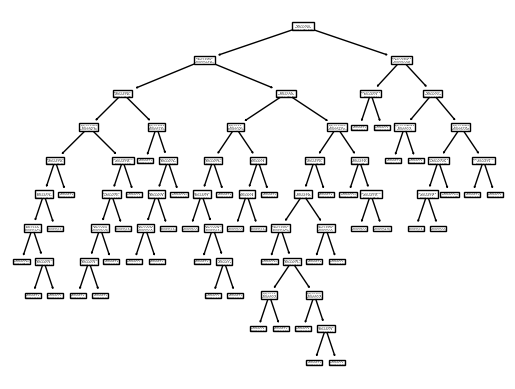

In [16]:
tree.plot_tree(clf)
plt.savefig('tree_img')

In [17]:
y_pred = clf.predict(X_test)

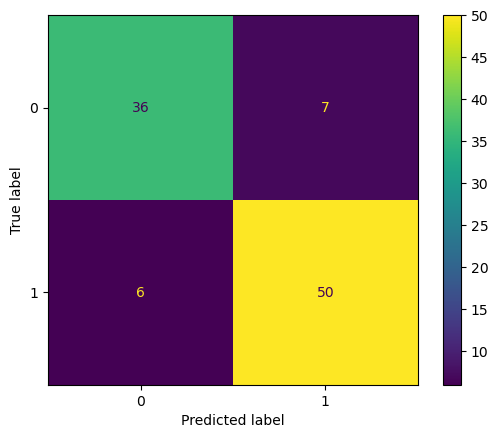

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_pred)
plt.show()

# Nice now lets make our own decison tree

In [19]:
X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()


In [20]:
mytree = DecisionTree(max_depth=15)


print(X_train.shape,' ',y_train.shape)
mytree.fit(X_train, y_train)

#mytree.print_tree()

(393, 7)   (393,)
her min sampls
her info gain
her info gain
her min sampls
her min sampls
her info gain
her info gain
her min sampls


Results:

86  from size of:  99 

0.8686868686868687


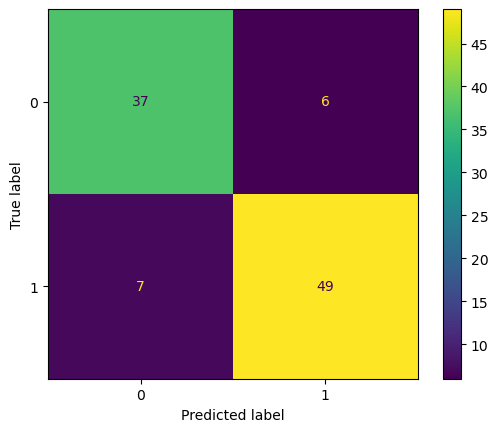

In [21]:
test_pred = mytree.predict(X_test)

print('Results:\n')
print(sum(test_pred == y_test),' from size of: ',len(test_pred),'\n')
print(sum(test_pred == y_test)/len(test_pred))

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
accuracy_score(y_test, test_pred)

ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=test_pred)
plt.show()


In [22]:
X_test.shape[0]

99